In [1]:
print('灵活的数据读取。')



灵活的数据读取。


In [4]:
# ImageFolder
from torchvision.datasets import ImageFolder
folder_set = ImageFolder('../data/example_data/image/')
folder_set.class_to_idx


{'class_1': 0, 'class_2': 1, 'class_3': 2}

In [5]:
folder_set.imgs



[('../data/example_data/image/class_1/1.png', 0),
 ('../data/example_data/image/class_1/2.png', 0),
 ('../data/example_data/image/class_1/3.png', 0),
 ('../data/example_data/image/class_2/10.png', 1),
 ('../data/example_data/image/class_2/11.png', 1),
 ('../data/example_data/image/class_2/12.png', 1),
 ('../data/example_data/image/class_3/16.png', 2),
 ('../data/example_data/image/class_3/17.png', 2),
 ('../data/example_data/image/class_3/18.png', 2)]

In [11]:
im, label = folder_set[0]


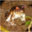

In [12]:
im



In [13]:
label



0

In [14]:
# 加上预处理
from torchvision import transforms as tfs
data_tf = tfs.ToTensor()
folder_set = ImageFolder('../data/example_data/image/', transform=data_tf)
im, label = folder_set[0]



In [15]:
im

tensor([[[0.2314, 0.1686, 0.1961,  ..., 0.6196, 0.5961, 0.5804],
         [0.0627, 0.0000, 0.0706,  ..., 0.4824, 0.4667, 0.4784],
         [0.0980, 0.0627, 0.1922,  ..., 0.4627, 0.4706, 0.4275],
         ...,
         [0.8157, 0.7882, 0.7765,  ..., 0.6275, 0.2196, 0.2078],
         [0.7059, 0.6784, 0.7294,  ..., 0.7216, 0.3804, 0.3255],
         [0.6941, 0.6588, 0.7020,  ..., 0.8471, 0.5922, 0.4824]],

        [[0.2431, 0.1804, 0.1882,  ..., 0.5176, 0.4902, 0.4863],
         [0.0784, 0.0000, 0.0314,  ..., 0.3451, 0.3255, 0.3412],
         [0.0941, 0.0275, 0.1059,  ..., 0.3294, 0.3294, 0.2863],
         ...,
         [0.6667, 0.6000, 0.6314,  ..., 0.5216, 0.1216, 0.1333],
         [0.5451, 0.4824, 0.5647,  ..., 0.5804, 0.2431, 0.2078],
         [0.5647, 0.5059, 0.5569,  ..., 0.7216, 0.4627, 0.3608]],

        [[0.2471, 0.1765, 0.1686,  ..., 0.4235, 0.4000, 0.4039],
         [0.0784, 0.0000, 0.0000,  ..., 0.2157, 0.1961, 0.2235],
         [0.0824, 0.0000, 0.0314,  ..., 0.1961, 0.1961, 0.

In [16]:
label



0

In [17]:
len(folder_set)



9

In [18]:
# DataSet
from torch.utils.data import Dataset
# 定义一个子类继承DataSet。


class custom_dataset(Dataset):
    def __init__(self, txt_path, transform=None):
        self.transform = transform
        with open(txt_path, 'r') as f:
            lines = f.readlines()
        
        self.img_list = [i.split()[0] for i in lines] # 图像名称
        self.label_list = [i.split()[1] for i in lines] # 所有的label
        
    def __getitem__(self, idx):
        img = self.img_list[idx]
        label = self.label_list[idx]
        if self.transform is not None:
            img = self.transform(img)
        return img, label
    
    def __len__(self):
        return len(self.label_list)
    


In [21]:
txt_dataset = custom_dataset('../data/example_data/train.txt')
data, label = txt_dataset[0]
print(data)
print(label)

data2, label2 = txt_dataset[34]
print(data2)
print(label2)

1009_2.png
YOU
1046_7.png
LIFE


In [22]:
# DataLoader
from torch.utils.data import DataLoader
train_data1 = DataLoader(folder_set, batch_size=2, shuffle=True)
for im, label in train_data1:
    print(label)
    




tensor([1, 0])
tensor([2, 1])
tensor([0, 2])
tensor([1, 2])
tensor([0])


In [23]:
train_data2 = DataLoader(txt_dataset, 8, True)
im, label = next(iter(train_data2))


In [24]:
im



('2464_5.png',
 '1053_3.png',
 '2192_9.png',
 '2609_6.png',
 '2192_2.png',
 '728_5.png',
 '681_5.png',
 '958_16.png')